In [85]:
import numpy as np
import bezier
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely import Polygon, Point, distance, LineString

In [86]:
bezier_points_list = []
bezier_df = pd.read_excel("Essai 1.xlsx", index_col=0) 
bezier_df_1 = bezier_df.loc[2:9, bezier_df.columns.str.startswith("P")]
for row in bezier_df_1.itertuples():
    bezier_points = np.array([[row.P0X, row.P0Y], [row.P1X, row.P1Y], [row.P2X, row.P2Y], [row.P3X, row.P3Y]]).T
    bezier_points_list.append(bezier_points)
bezier_points_list

[array([[52.532589 , 57.014109 , 61.703059 , 61.518349 ],
        [ 7.4278321,  9.6947421, 13.683872 , 19.081782 ]]),
 array([[61.518349, 61.210779, 56.548799, 51.32293 ],
        [19.081782, 28.070362, 33.386922, 37.660222]]),
 array([[51.32293 , 54.892819, 57.158169, 59.912589],
        [37.660222, 44.409352, 49.064272, 53.647831]]),
 array([[59.912589, 66.047329, 71.861309, 74.270559],
        [53.647831, 46.756992, 39.083402, 30.050422]]),
 array([[74.270559, 76.084159, 74.150189, 68.815469],
        [30.050422, 23.250702, 15.410332, 10.606942]]),
 array([[68.815469 , 62.576989 , 54.021839 , 45.73646  ],
        [10.606942 ,  4.9898121,  2.5343521,  2.7182421]]),
 array([[45.73646  , 41.98356  , 38.13626  , 34.78259  ],
        [ 2.7182421,  2.8015421,  3.3137021,  5.0878321]]),
 array([[34.78259  , 40.7598   , 47.04637  , 52.532589 ],
        [ 5.0878321,  4.4183721,  4.6527121,  7.4278321]])]

In [87]:
bezier_df
all(map(lambda col: col in bezier_df.columns, ["Type", "P0X", "P0Y", "P1X", "P1Y", "P2X", "P2Y", "P3X", "P3Y"]))

True

In [88]:
bezier_curve_list = [
    bezier.Curve(
        bezier_points,
        degree=3,
    )
    for bezier_points in bezier_points_list
]
bezier_curve_list

[<Curve (degree=3, dimension=2)>,
 <Curve (degree=3, dimension=2)>,
 <Curve (degree=3, dimension=2)>,
 <Curve (degree=3, dimension=2)>,
 <Curve (degree=3, dimension=2)>,
 <Curve (degree=3, dimension=2)>,
 <Curve (degree=3, dimension=2)>,
 <Curve (degree=3, dimension=2)>]

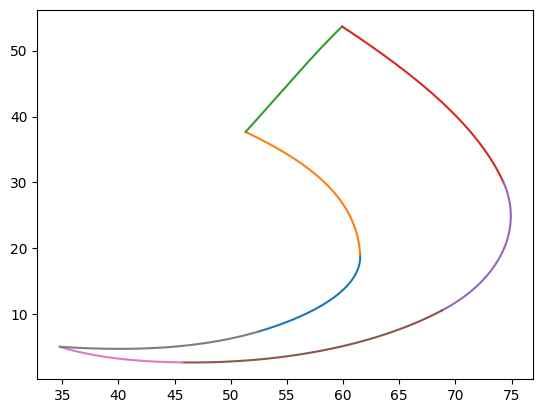

In [89]:
fig, ax = plt.subplots()
for bezier_curve in bezier_curve_list:
    bezier_curve.plot(256, ax=ax)

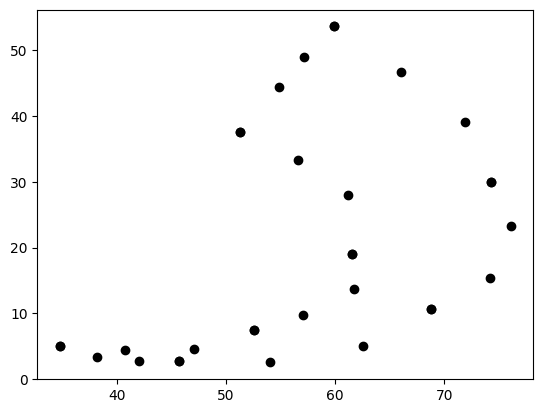

In [90]:
fig, ax = plt.subplots()
for bezier_points in bezier_points_list:
    ax.scatter(*bezier_points, color="black")

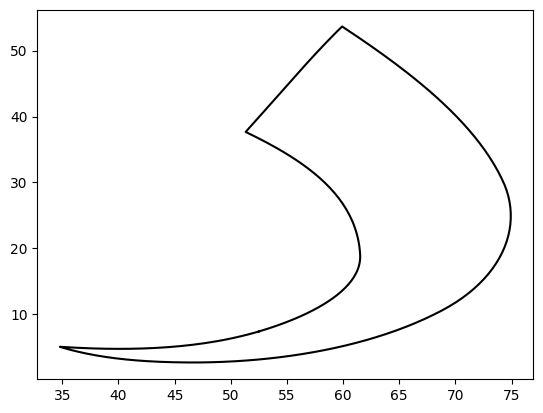

In [91]:
fig, ax = plt.subplots()
array_0_1 = np.linspace(0, 1, 50)
bezier_evaluation_list = []
for bezier_curve in bezier_curve_list:
    bezier_evaluation_list.append(bezier_curve.evaluate_multi(array_0_1).T)
bezier_evaluation_array = np.concatenate(bezier_evaluation_list)
ax.plot(*bezier_evaluation_array.T, color="black")

In [92]:
polygon_evaluations = Polygon(bezier_evaluation_array)
linestring_evaluations = LineString(bezier_evaluation_array)

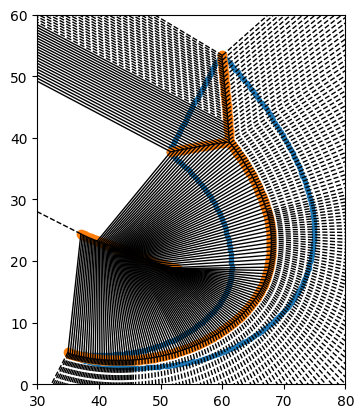

In [93]:
fig, ax = plt.subplots()
vor = Voronoi(bezier_evaluation_array)
voronoi_plot_2d(vor, ax=ax)
ax.set_xlim(30, 80)
ax.set_ylim(0, 60)
ax.set_aspect("equal")

(0.0, 60.0)

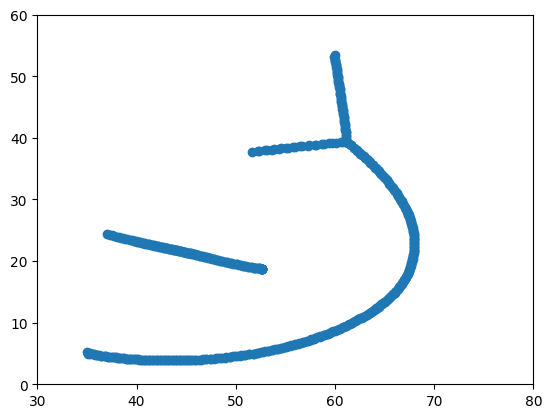

In [94]:
plt.scatter(*vor.vertices.T)
plt.xlim(30, 80)
plt.ylim(0, 60)

In [95]:
inside_vertices = []
inside_vertices_distance = []
for vertex in vor.vertices:
    point = Point(vertex)
    if polygon_evaluations.contains(Point(vertex)):
        inside_vertices.append(vertex)
        inside_vertices_distance.append(distance(point, linestring_evaluations))

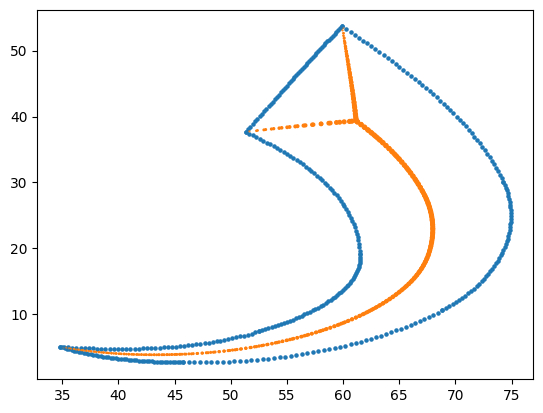

In [96]:
plt.scatter(*bezier_evaluation_array.T, s=5)
plt.scatter(*np.array(inside_vertices).T, s=inside_vertices_distance)

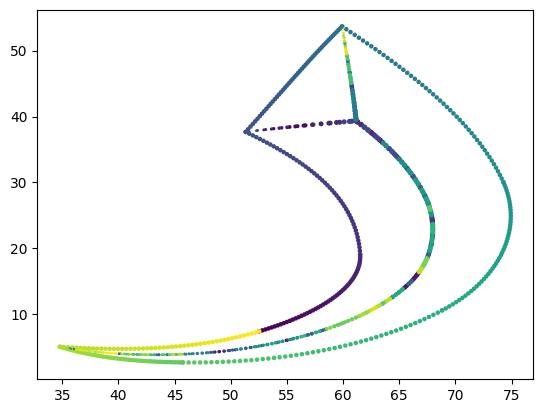

In [99]:
plt.scatter(
    *bezier_evaluation_array.T, c=np.arange(bezier_evaluation_array.shape[0]), s=5
)
plt.scatter(
    *np.array(inside_vertices).T,
    c=np.arange(len(inside_vertices)),
    s=inside_vertices_distance
)

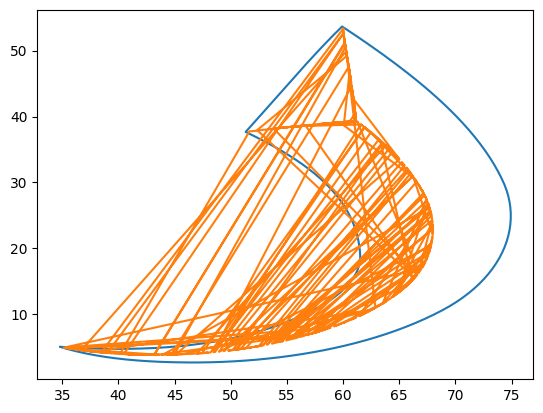

In [101]:
plt.plot(
    *bezier_evaluation_array.T
)
plt.plot(
    *np.array(inside_vertices).T,
)